In [80]:
#Let's start with importing necessary libraries
import os
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler , label_binarize
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,auc, confusion_matrix, roc_curve, roc_auc_score,classification_report
from pandas_profiling import ProfileReport
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Initially I have corrected 1 file- dataset4.csv from bending2 folder as was separated with both ',' &
' ' space and then I have created the file with merging all the data

In [19]:
all_dat = pd.DataFrame()
for dirpath, dirnames, files in os.walk('.'):
    print(f'Found directory: {dirpath}')
    for file_name in files:
        if file_name.endswith('.csv'):
            current_data = pd.read_csv(dirpath+"/"+file_name , encoding = "ISO-8859-1", skiprows=4,error_bad_lines=False)  
            current_data['label'] = dirpath[2:]                
            all_dat = pd.concat([all_dat,current_data])
            print(file_name)


Found directory: .
Found directory: .\.ipynb_checkpoints
Found directory: .\bending1
dataset1.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
Found directory: .\bending2
dataset1.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
Found directory: .\cycling
dataset1.csv
dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
dataset14.csv
dataset15.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv
Found directory: .\lying
dataset1.csv


b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
dataset14.csv
dataset15.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv
Found directory: .\sitting
dataset1.csv
dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
dataset14.csv
dataset15.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv
Found directory: .\standing
dataset1.csv
dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
dataset14.csv
dataset15.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv
Found directory: .\walking
dataset1.csv
dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
dataset14.csv
dataset15.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv


In [20]:
#renaming colmn
all_dat.rename(columns={'# Columns: time':'time'}, inplace=True)

In [21]:
all_dat.to_csv("final_data.csv",index = False)

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0         0      39.25       0.43      22.75       0.43      33.75       1.30   
1       250      39.25       0.43      23.00       0.00      33.00       0.00   
2       500      39.25       0.43      23.25       0.43      33.00       0.00   
3       750      39.50       0.50      23.00       0.71      33.00       0.00   
4      1000      39.50       0.50      24.00       0.00      33.00       0.00   
..      ...        ...        ...        ...        ...        ...        ...   
475  118750      31.50       1.66      12.50       3.20      14.25       4.44   
476  119000      27.33       1.25      11.33       0.94      20.00       4.00   
477  119250      37.80       7.68      14.20       2.48      17.25       0.83   
478  119500      33.75       1.30      15.75       5.21      16.50       2.69   
479  119750      32.67       3.09      18.67       0.47      14.00       3.16   

        label  
0    bending1  
1    bending1  
2    bending1  
3    bending1  
4    bending1  
..        ...  
475   walking  
476   walking  
477   walking  
478   walking  
479   walking  

[42237 rows x 8 columns]

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0           0      39.25       0.43      22.75       0.43      33.75   
1         250      39.25       0.43      23.00       0.00      33.00   
2         500      39.25       0.43      23.25       0.43      33.00   
3         750      39.50       0.50      23.00       0.71      33.00   
4        1000      39.50       0.50      24.00       0.00      33.00   
...       ...        ...        ...        ...        ...        ...   
42232  118750      31.50       1.66      12.50       3.20      14.25   
42233  119000      27.33       1.25      11.33       0.94      20.00   
42234  119250      37.80       7.68      14.20       2.48      17.25   
42235  119500      33.75       1.30      15.75       5.21      16.50   
42236  119750      32.67       3.09      18.67       0.47      14.00   

       var_rss23     label  
0           1.30  bending1  
1           0.00  bending1  
2           0.00  bending1  
3           0.00  bending1  
4           0.00  bending1  
...          ...       ...  
42232       4.44   walking  
42233       4.00   walking  
42234       0.83   walking  
42235       2.69   walking  
42236       3.16   walking  

[42237 rows x 8 columns]

In [4]:
# converting time column into category
df['time'] = df.time.astype('object')

In [5]:
df.dtypes

time          object
avg_rss12    float64
var_rss12    float64
avg_rss13    float64
var_rss13    float64
avg_rss23    float64
var_rss23    float64
label         object
dtype: object

In [6]:
df.describe()

avg_rss12     var_rss12     avg_rss13     var_rss13     avg_rss23  \
count  42237.000000  42237.000000  42237.000000  42237.000000  42237.000000   
mean      38.917394      1.459142     14.277895      1.502218     16.034921   
std        6.337385      2.048017      5.435382      1.639554      6.736081   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       35.000000      0.400000     11.330000      0.430000     12.000000   
50%       39.750000      0.500000     15.000000      0.830000     16.000000   
75%       43.750000      1.790000     18.000000      2.290000     19.250000   
max       56.250000     17.240000     35.000000     11.420000     40.330000   

          var_rss23  
count  42237.000000  
mean       1.620690  
std        1.637101  
min        0.000000  
25%        0.470000  
50%        1.000000  
75%        2.290000  
max       13.610000

In [40]:
ProfileReport(df)

From Pearson graph, we can see that there is no multicollinearity between feature columns.

Later on we will check with the help of VIF.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

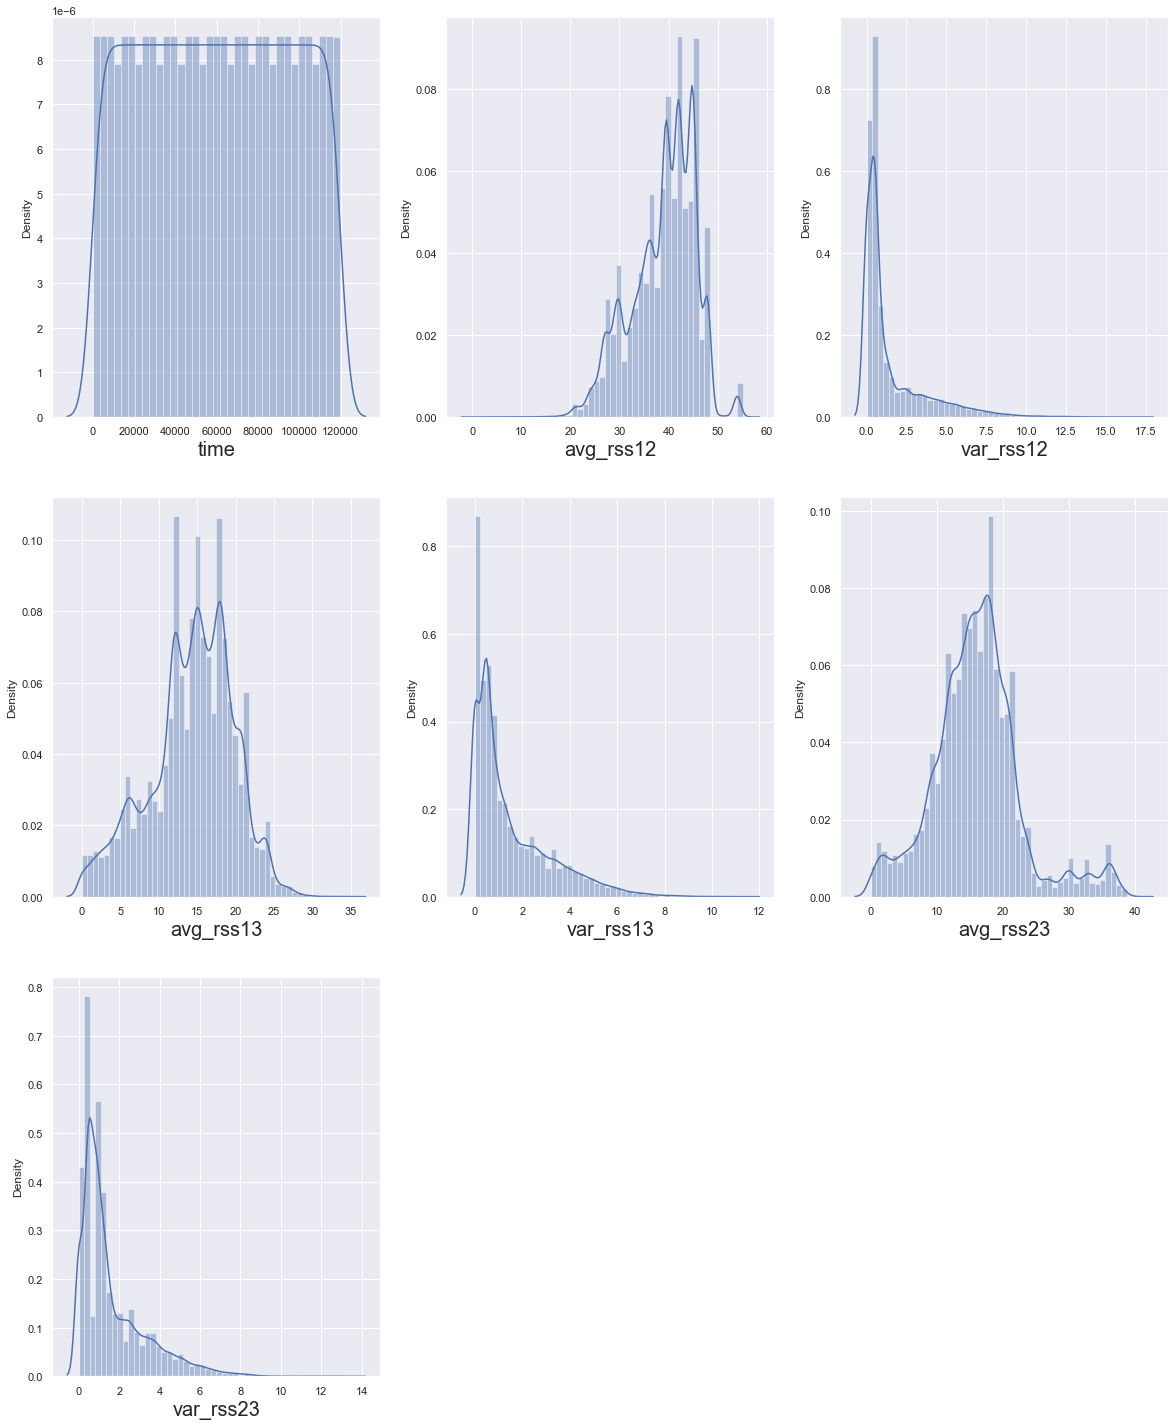

In [31]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=7 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

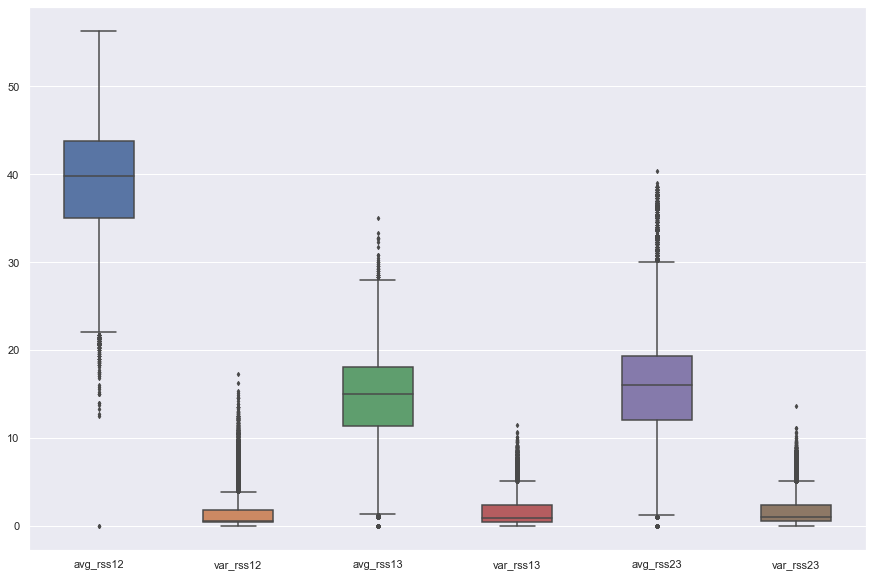

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df.drop(columns = 'time'), width= 0.5,ax=ax,  fliersize=3)

As we can see there are skewness in the columns of our dataset so now we have to handle particular data having skewness -> -> 

In [8]:
q = df['avg_rss12'].quantile(0.02)
# we are removing the bottom 1% data from the avg_rss12 column
data_cleaned = df[df['avg_rss12']>q]
q = df['var_rss12'].quantile(0.95)
# we are removing the top 5% data from the var_rss12 column
data_cleaned = data_cleaned[data_cleaned['var_rss12']<q]

q = df['avg_rss13'].quantile(0.99)
# we are removing the top 5% data from the avg_rss13 column
data_cleaned = data_cleaned[data_cleaned['avg_rss13']<q]
q = df['avg_rss13'].quantile(0.99)
# we are removing the top 5% data from the avg_rss23 column
data_cleaned = data_cleaned[data_cleaned['avg_rss23']<q]

q = df['var_rss13'].quantile(0.95)
# we are removing the top 5% data from the var_rss13 column
data_cleaned = data_cleaned[data_cleaned['var_rss13']<q]
q = df['var_rss23'].quantile(0.95)
# we are removing the top 5% data from the var_rss23 column
data_cleaned = data_cleaned[data_cleaned['var_rss23']<q]



C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

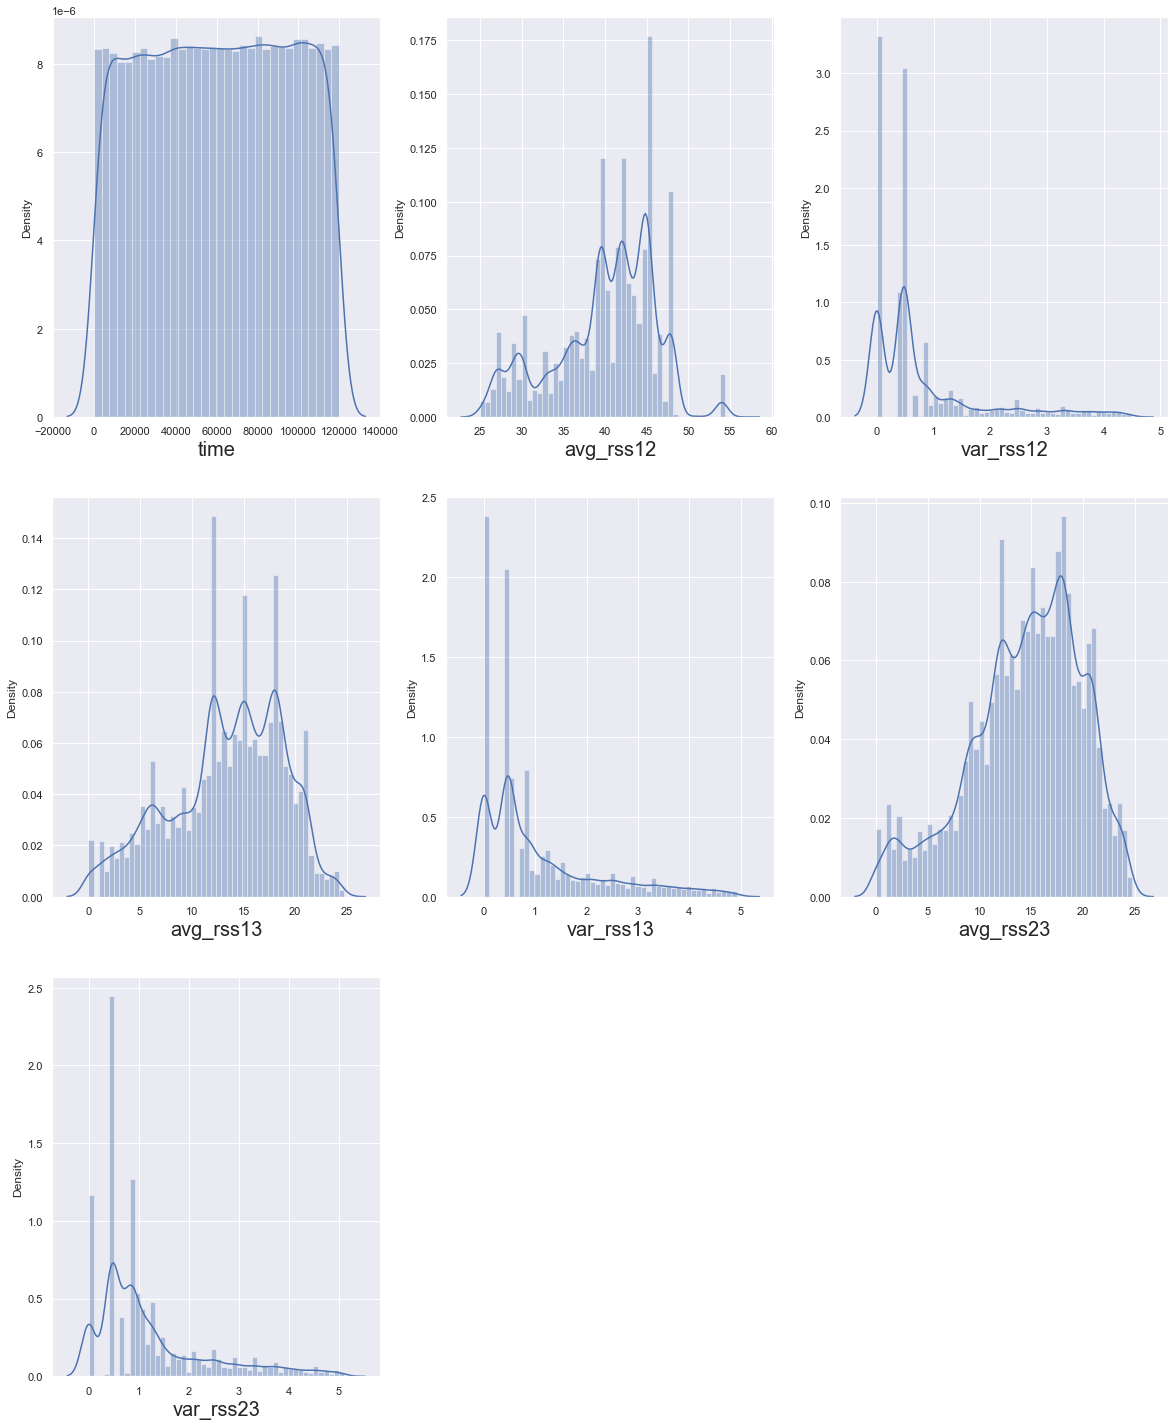

In [105]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=7 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

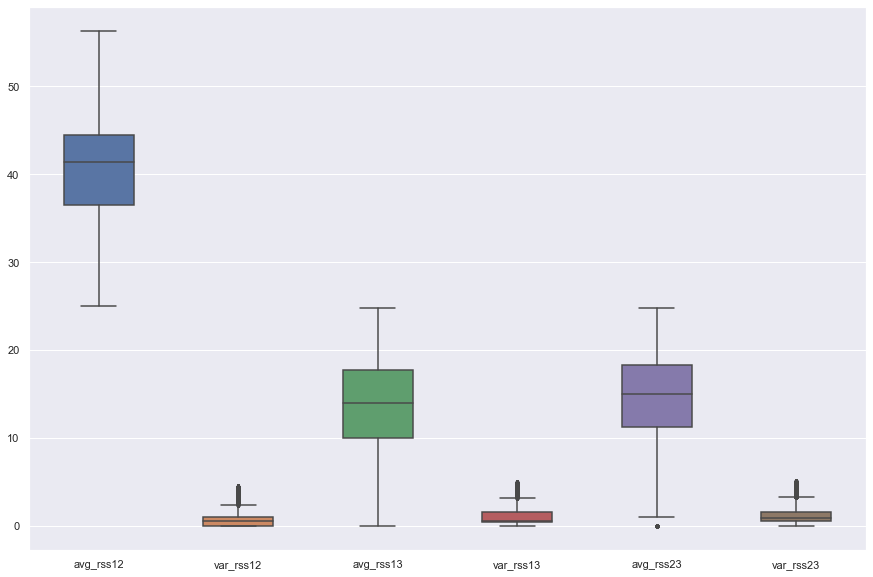

In [106]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned.drop(columns = 'time'), width= 0.5,ax=ax,  fliersize=3)

Here we have to tried to handle skewness in our data

In [9]:
x = data_cleaned.drop(columns= ['label','time'])
y = data_cleaned['label']

In [10]:
x

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
1831       34.50       1.50       9.00       4.53      23.50       2.18
1832       36.00       0.00      17.50       0.87      20.00       1.22
1833       35.00       1.41      12.67       1.25      21.25       1.09
1834       41.00       1.26      23.00       3.16      24.00       0.00
1842       36.00       0.00      19.00       0.71      24.50       0.50
...          ...        ...        ...        ...        ...        ...
42229      36.00       0.00      18.50       4.15      15.00       2.45
42230      36.00       2.45      14.75       4.55      14.67       3.40
42232      31.50       1.66      12.50       3.20      14.25       4.44
42233      27.33       1.25      11.33       0.94      20.00       4.00
42236      32.67       3.09      18.67       0.47      14.00       3.16

[33105 rows x 6 columns]

In [11]:
y

1831     bending1
1832     bending1
1833     bending1
1834     bending1
1842     bending1
           ...   
42229     walking
42230     walking
42232     walking
42233     walking
42236     walking
Name: label, Length: 33105, dtype: object

In [12]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [12]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

vif   Features
0  1.162762  avg_rss12
1  1.896908  var_rss12
2  1.260032  avg_rss13
3  1.815864  var_rss13
4  1.213639  avg_rss23
5  1.805839  var_rss23

As we can see from VIF, all the values are less than 10 i.e no multicollinearity is present amoung feature columns

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.2, random_state =144)

In [254]:
met = pd.DataFrame()
met['recall'] = recall_score(y_test, y_predicted_multinomial,average=None)
met['precision'] = precision_score(y_test, y_predicted_multinomial,average=None)
met['f1 score'] = f1_score(y_test, y_predicted_multinomial,average=None)
met['columns'] = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
met.set_index('columns',inplace=True)
met

recall  precision  f1 score
columns                                
bending1  0.352941   0.503817  0.415094
bending2  0.695332   0.672209  0.683575
cycling   0.685223   0.610460  0.645684
lying     0.858733   0.793059  0.824591
sitting   0.516286   0.541031  0.528369
standing  0.625089   0.638205  0.631579
walking   0.542781   0.629457  0.582915

In [327]:
y_binary = label_binarize(y_test, classes=['bending1', 'bending2', 'cycling', 'lying','sitting', 'standing', 'walking'])
auc_macro_dict = {}
accuracy = {}
f1_s = {}
solver = ["lbfgs", "sag", "saga", "newton-cg"]
multiclass = ['ovr','multinomial']
for k in range(len(multiclass)):
    for i in range(len(solver)):
        lr = LogisticRegression(multi_class=multiclass[k], solver=solver[i],random_state= 40)
        lr.fit(x_train, y_train)
        y_pred = lr.predict(x_test)
        y_pred_prob = lr.predict_proba(x_test)
        val = roc_auc_score(y_binary, y_pred_prob, average='macro')
        
        auc_macro_dict[solver[i],multiclass[k]] = val
        accuracy[solver[i],multiclass[k]] = accuracy_score(y_test, y_pred)
        f1_s[solver[i],multiclass[k]] = f1_score(y_test, y_pred, average='macro')
for k in range(len(multiclass)):
    for i in range(len(solver)):
        print(f"For {solver[i],multiclass[k]} followings are the matrics ")
        print(f'AUC values after macro average = {round(auc_macro_dict[solver[i],multiclass[k]]*100, 6)}')
        print(f'accuracy = {round(accuracy[solver[i],multiclass[k]]*100, 6)}')
        print(f'f1 score is {round(f1_s[solver[i],multiclass[k]]*100, 6)}')
        print("*********************************************")

For ('lbfgs', 'ovr') followings are the matrics 
AUC values after macro average = 91.58062
accuracy = 63.253285
f1 score is 58.734801
*********************************************
For ('sag', 'ovr') followings are the matrics 
AUC values after macro average = 91.580593
accuracy = 63.253285
f1 score is 58.734801
*********************************************
For ('saga', 'ovr') followings are the matrics 
AUC values after macro average = 91.580603
accuracy = 63.253285
f1 score is 58.734801
*********************************************
For ('newton-cg', 'ovr') followings are the matrics 
AUC values after macro average = 91.58066
accuracy = 63.253285
f1 score is 58.734801
*********************************************
For ('lbfgs', 'multinomial') followings are the matrics 
AUC values after macro average = 92.449451
accuracy = 64.839148
f1 score is 61.597237
*********************************************
For ('sag', 'multinomial') followings are the matrics 
AUC values after macro average = 

In [332]:
max_value = max(auc_macro_dict.values())  # maximum value
max_keys = [k for k, v in auc_macro_dict.items() if v == max_value] # getting all keys containing the `maximum`
print(f'{max_keys} is a model we should choose as it is getting highest {max_value} AUC_ROC Score')

[('sag', 'multinomial')] is a model we should choose as it is getting highest 0.9244959259336033 AUC_ROC Score
